In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style

In [4]:
df_google = pd.read_csv("GOOG.csv")
df_google.head()

,date,open,high,low,close,volume
0,2014-03-27,28.4000,28.4000,27.6460,27.9230,262000
1,2014-03-28,28.0600,28.3215,27.9335,27.9995,822000
2,2014-03-31,28.3445,28.3500,27.8465,27.8485,216000
3,2014-04-01,27.9355,28.4225,27.9355,28.3580,158000
4,2014-04-02,28.2553,30.2415,28.1095,28.3500,2934000


In [5]:
df_google.info() # check the data types in google csv dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2360 non-null   object 
 1   open    2360 non-null   float64
 2   high    2360 non-null   float64
 3   low     2360 non-null   float64
 4   close   2360 non-null   float64
 5   volume  2360 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 110.8+ KB


In [6]:
df_google.dtypes # short - check the data types in google csv dataframe

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [7]:
df_google['date'] = pd.to_datetime(df_google['date'], format='%Y-%m-%d')
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2360 non-null   datetime64[ns]
 1   open    2360 non-null   float64       
 2   high    2360 non-null   float64       
 3   low     2360 non-null   float64       
 4   close   2360 non-null   float64       
 5   volume  2360 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 110.8 KB


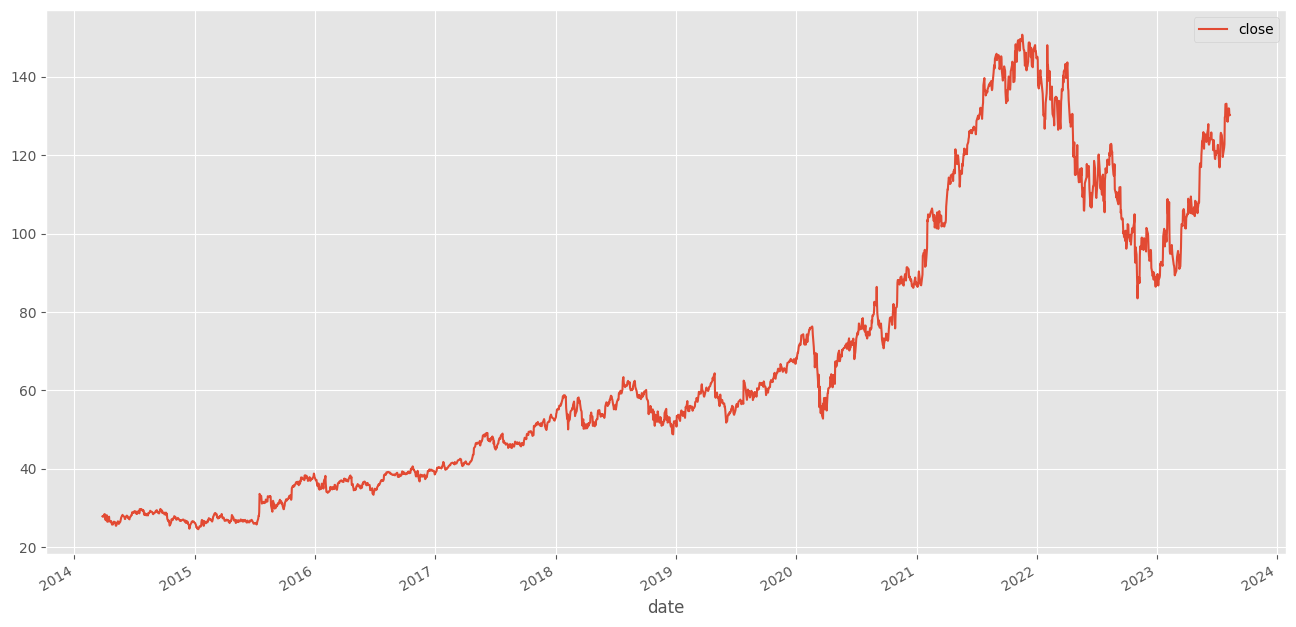

In [8]:
style.use("ggplot")
df_google.plot(x="date", y="close", figsize=(16,8))
plt.show()

In [70]:
%%timeit
window_size = 100
closing_prices = df_google['close'].tolist()
# Calculate the moving average
moving_average = []
for i in range(len(closing_prices) - window_size + 1):
    average = np.mean(closing_prices[i:i+window_size])
    moving_average.append(average)


56.5 ms ± 4.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [76]:
df_google["moving_averages"] = [0] * (window_size - 1) + moving_average
df_google.head()

,date,open,high,low,close,volume,moving_averages
0,2014-03-27,28.4000,28.4000,27.6460,27.9230,262000,0.0
1,2014-03-28,28.0600,28.3215,27.9335,27.9995,822000,0.0
2,2014-03-31,28.3445,28.3500,27.8465,27.8485,216000,0.0
3,2014-04-01,27.9355,28.4225,27.9355,28.3580,158000,0.0
4,2014-04-02,28.2553,30.2415,28.1095,28.3500,2934000,0.0


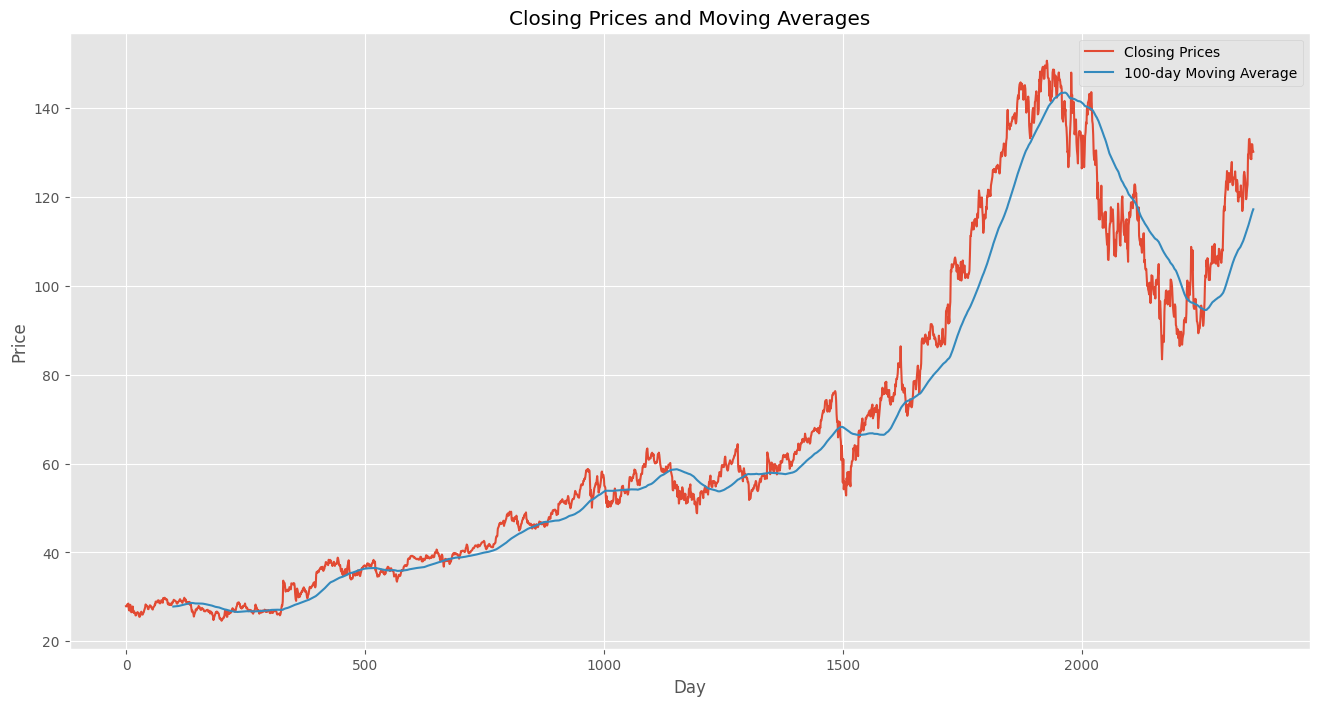

In [26]:
plt.figure(figsize=(16, 8))
plt.plot(closing_prices, label='Closing Prices')
plt.plot(range(window_size - 1, len(closing_prices)), moving_average, label=f'{window_size}-day Moving Average')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('Closing Prices and Moving Averages')
plt.show()